# Week One Task-1 Exploratory Data Analysis (EDA)

In [64]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
file_path = r"C:\ML and DS Files\Kifiya AI\Kaim-week-1\week 1 data\Data\raw_analyst_ratings\raw_analyst_ratings.csv"
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# 1. Data Check and Cleaning

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [67]:
# check for missing values
missing_summary = data.isnull().sum()
print('Missing Value Summary')
print(missing_summary)

Missing Value Summary
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


# 2. Descriptive Statistics:

### 2.1 Obtain basic statistics for textual lengths (like headline length).

In [68]:

data['headline_length'] = data['headline'].astype(str).apply(len)
print('Headline Length Statistics')
print(data['headline_length'].describe())

Headline Length Statistics
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### 2.2 Plot Headline length in histogram

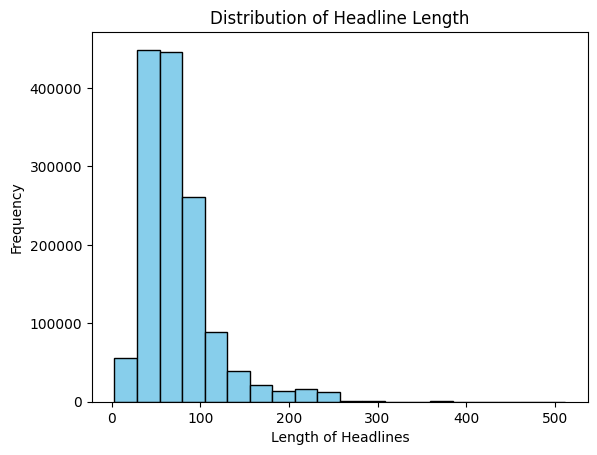

In [69]:

plt.hist(data['headline_length'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Headline Length')
plt.xlabel('Length of Headlines')
plt.ylabel('Frequency')
plt.show()

### 2.3 Count the number of articles per publisher to identify which publishers are most active.


In [70]:
data['publisher'].value_counts().sort_values()

publisher
Stock Market Newz                    1
Miri Segal                           1
mjintertrader                        1
adam@eosdetroit.io                   1
Scout Finance Editorial Team         1
                                 ...  
Monica Gerson                    82380
Charles Gross                    96732
Benzinga Newsdesk               150484
Lisa Levin                      186979
Paul Quintaro                   228373
Name: count, Length: 1034, dtype: int64

### 2.4 Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

In [71]:
data.head(2)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42


####  2.4.1 preprocess the data to ensure both date formats are correctly parsed into a unified datetime column.

In [74]:
from dateutil import parser
def parse_mixed_dates(date_str):
    try:
        # Use dateutil parser for flexible parsing
        dt = parser.parse(date_str)
        # Localize naive datetimes to UTC
        if dt.tzinfo is None:
            return dt.replace(tzinfo=pd.Timestamp(0).tzinfo)
        return dt
    except Exception:
        return pd.NaT  # Return NaT for invalid dates

# Apply the custom parser to the 'date' column
data['date'] = data['date'].apply(parse_mixed_dates)

"from dateutil import parser\ndef parse_mixed_dates(date_str):\n    try:\n        # Use dateutil parser for flexible parsing\n        dt = parser.parse(date_str)\n        # Localize naive datetimes to UTC\n        if dt.tzinfo is None:\n            return dt.replace(tzinfo=pd.Timestamp(0).tzinfo)\n        return dt\n    except Exception:\n        return pd.NaT  # Return NaT for invalid dates\n\n# Apply the custom parser to the 'date' column\ndata['date'] = data['date'].apply(parse_mixed_dates)"

In [87]:
# Ensure all dates are datetime objects and convert to UTC
data['date'] = pd.to_datetime(data['date'], utc=True)

In [88]:
data.head(15)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,71
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,73
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,120
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,84
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,42


In [90]:
data['date'].dtype

datetime64[ns, UTC]

#### 2.4.2 Extract time features, Analyze trends over time, Count articles by day, Count articles by year and month....

In [92]:
data.shape

(1407328, 7)

In [93]:
missing_date = data['date'] == 'NaT'
print('Missing Date')
print(missing_date.value_counts())

Missing Date
date
False    1407328
Name: count, dtype: int64


In [94]:
print(data['date'].dtype)

datetime64[ns, UTC]


In [95]:
#Extract time features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.day_name()

In [96]:
# Check the updated DataFrame
print(data[['date', 'year', 'month', 'day', 'day_of_week']].head())

                       date  year  month  day day_of_week
0 2020-06-05 14:30:54+00:00  2020      6    5      Friday
1 2020-06-03 14:45:20+00:00  2020      6    3   Wednesday
2 2020-05-26 08:30:07+00:00  2020      5   26     Tuesday
3 2020-05-22 16:45:06+00:00  2020      5   22      Friday
4 2020-05-22 15:38:59+00:00  2020      5   22      Friday


In [106]:
# Analyze trends over time
# Count articles by day
daily_counts = data.groupby('date').size()

# Count articles by month
monthly_counts = data.groupby(['year', 'month']).size()

# Count articles by year
yearly_count = data.groupby(['year']).size()

# Count articles by day of the week
weekday_counts = data['day_of_week'].value_counts()


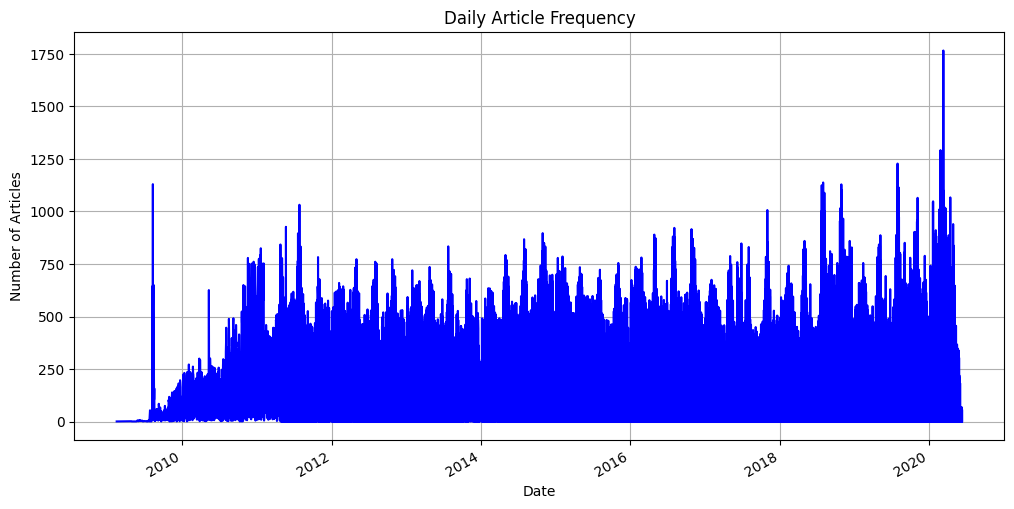

In [101]:
# Visualizations
# (a) Daily trends
plt.figure(figsize=(12, 6))
daily_counts.plot(title="Daily Article Frequency", color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()


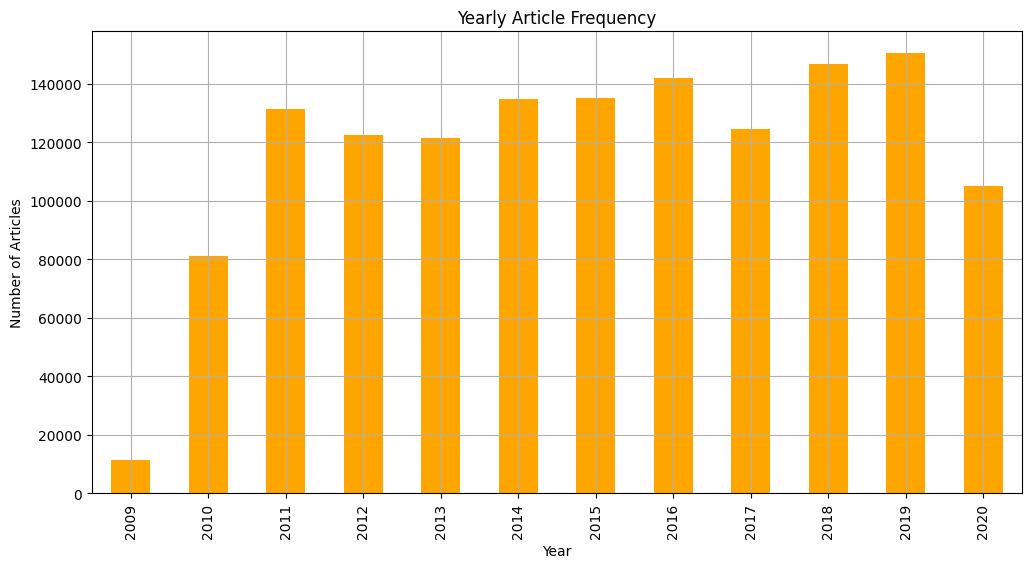

In [105]:
# (b) Yearly trends
yearly_count.plot(kind='bar', figsize=(12, 6), title="Yearly Article Frequency", color='orange')
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

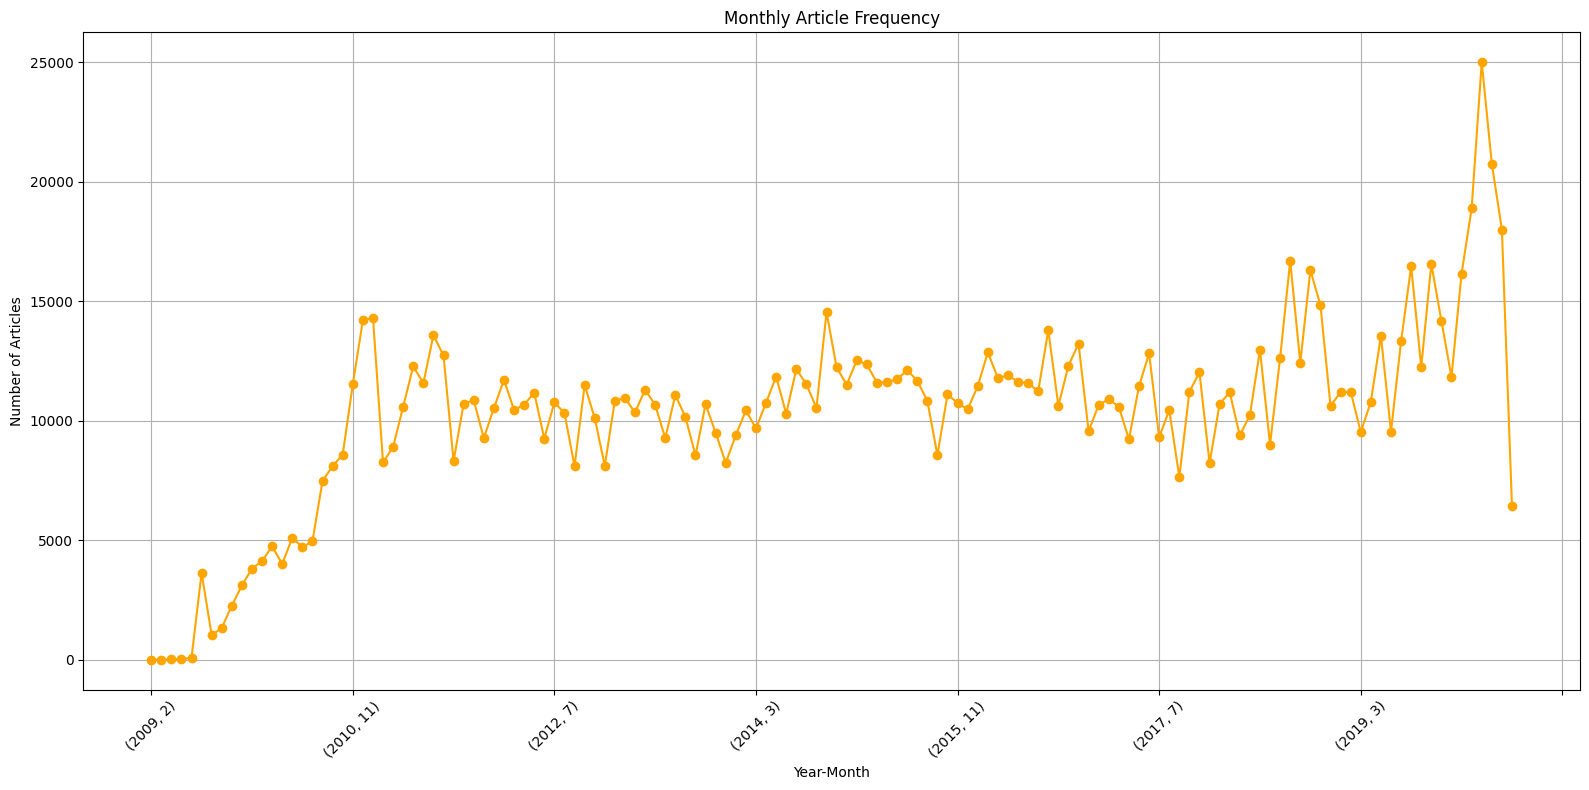

In [108]:
# Plot as a line chart
monthly_counts.plot(kind='line', figsize=(16, 8), marker='o', color='orange', title="Monthly Article Frequency")
plt.xlabel("Year-Month")
plt.ylabel("Number of Articles")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


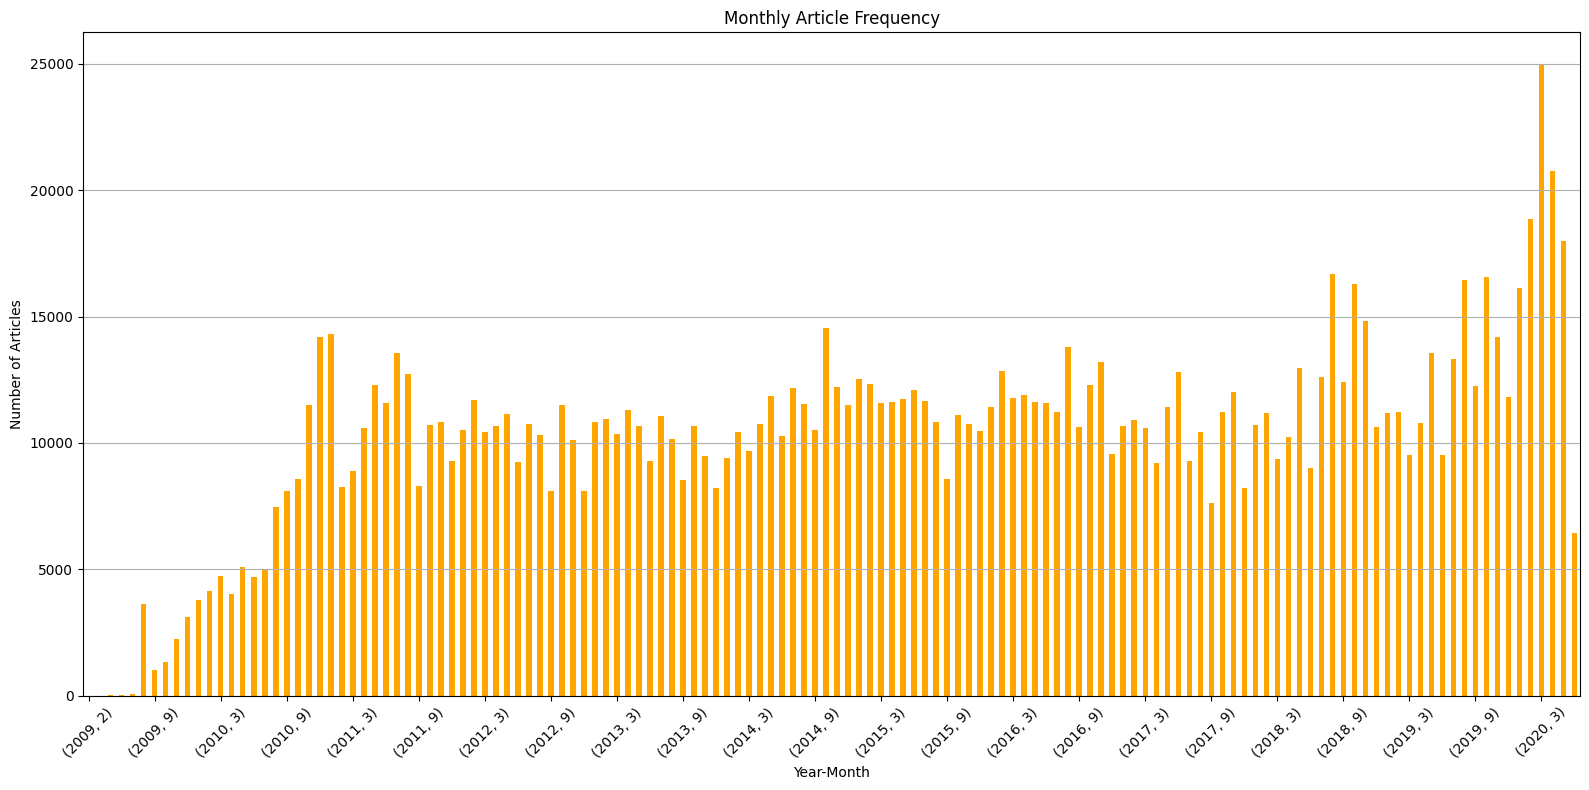

In [109]:
# Bar plot with reduced x-axis labels
ax = monthly_counts.plot(kind='bar', figsize=(16, 8), color='orange', title="Monthly Article Frequency")
plt.xlabel("Year-Month")
plt.ylabel("Number of Articles")
plt.grid(axis='y')

# Reduce number of x-axis labels
ticks_to_display = range(0, len(monthly_counts), 6)  # Show every 6th label
ax.set_xticks(ticks_to_display)
ax.set_xticklabels(monthly_counts.index[ticks_to_display], rotation=45)
plt.tight_layout()
plt.show()
